In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [3]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])
df['bimodal'] = bimodal

In [4]:
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,56.215206,7.061330,12.584125,18.258559,21.572446
1,59.421123,42.380999,11.038983,-12.795383,17.330893
2,45.131428,1.237538,6.716195,24.184255,21.883162
3,53.547698,4.281382,10.011857,16.654549,18.335566
4,50.689513,1.762020,6.339975,22.047828,19.166482


<AxesSubplot:ylabel='Density'>

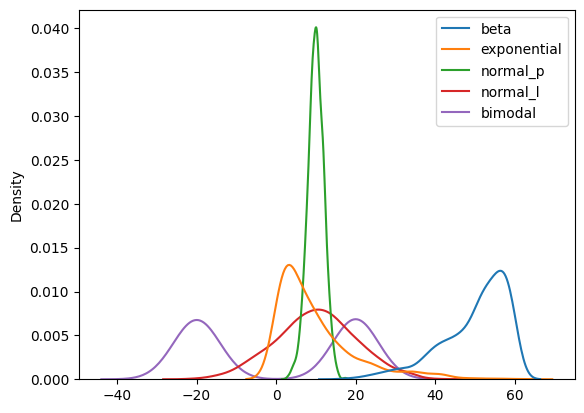

In [5]:
# Trực quan hóa dữ liệu sinh ra
sns.kdeplot(data=df)

In [6]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.984545,9.869301,9.957608,10.082945,-0.010380
std,8.403345,9.933600,2.035582,10.136439,20.171600
min,17.114517,0.004021,3.004339,-20.751589,-28.726289
25%,45.221812,2.767605,8.701189,3.588404,-19.836398
50%,52.267644,6.681232,10.006000,10.077180,-0.177561
75%,56.555082,13.313923,11.331123,16.681727,20.084297
max,59.994961,61.894820,17.363240,50.932999,30.978373


<AxesSubplot:ylabel='Density'>

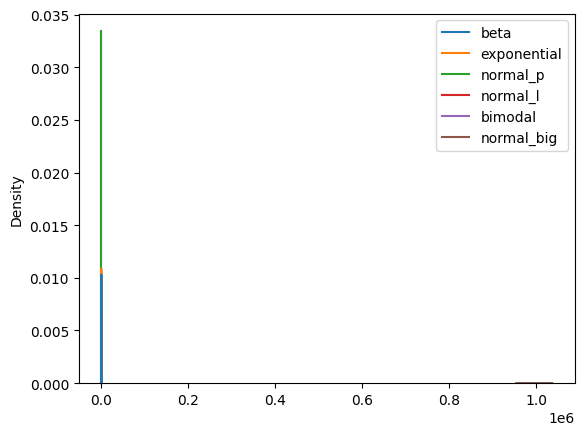

In [7]:
# Thêm một đặc trưng với giá trị lớn hơn nhiều
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<AxesSubplot:>

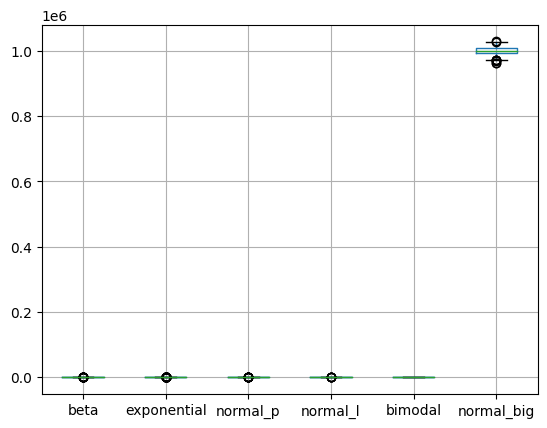

In [8]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

In [12]:
# Chuẩn hóa với Min-Max scaling
# Khai báo đối tượng MinMaxScaler
scaler = MinMaxScaler()
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = scaler.fit_transform(df)
# lấy danh sáchc cột
col_names = list(df.columns)
# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.911854,0.114028,0.667167,0.544192,0.842459,0.683013
1,0.986618,0.684706,0.559558,0.110989,0.771417,0.472742
2,0.653373,0.019931,0.258506,0.626855,0.847663,0.572715
3,0.849646,0.069111,0.488026,0.521816,0.788244,0.402788
4,0.782991,0.028405,0.232304,0.597052,0.802161,0.658147


<AxesSubplot:ylabel='Density'>

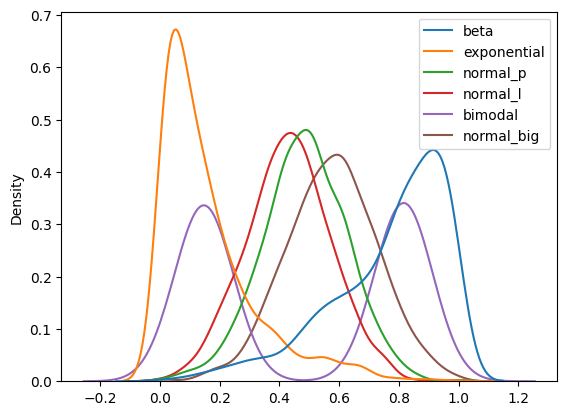

In [13]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

<AxesSubplot:>

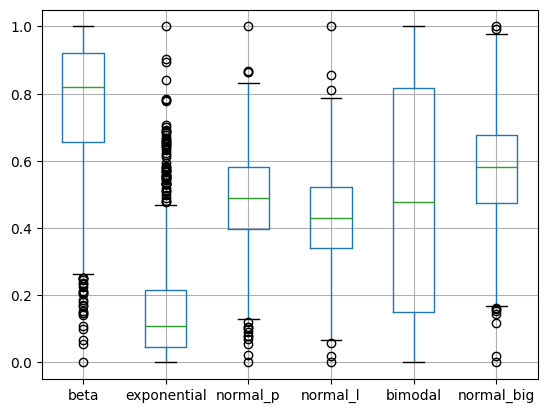

In [14]:
# trực quan hóa bằng biểu đồ box plot
df_s.boxplot()

In [15]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.766551,0.159398,0.484248,0.430142,0.480966,0.574814
std,0.195972,0.160502,0.141764,0.141403,0.337856,0.153340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.655480,0.044653,0.396747,0.339543,0.148898,0.472829
50%,0.819794,0.107887,0.487618,0.430061,0.478166,0.580439
75%,0.919780,0.215055,0.579904,0.522195,0.817534,0.677145
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
# lấy giá trị max của cột beta
df_s['beta'].max()

1.0

In [17]:
# lấy giá trị min của cột beta
df_s['beta'].min()

0.0

In [18]:
# in các giá trị min của từng cột trong dữ liệu chưa chuẩn hóa
mins = [df[col].min() for col in df.columns]
mins

[17.114517499564098,
 0.004021239392476197,
 3.0043387458508954,
 -20.751589285771686,
 -28.726288892974097,
 961828.7426028813]

In [19]:
# in các giá trị min của từng cột trong dữ liệu đã chuẩn hóa
mins = [df_s[col].min() for col in df_s.columns]
mins

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [20]:
# in các giá trị max của từng cột dữ liệu chưa chuẩn hóa
maxs = [df[col].max() for col in df.columns]
maxs

[59.994961343960256,
 61.89482038180615,
 17.363239923447104,
 50.93299902877018,
 30.978373490566092,
 1028903.7763380908]

In [21]:
# in các giá trị max của từng cột dữ liệu đã chuẩn hóa
maxs = [df_s[col].max() for col in df_s.columns]
maxs

[1.0, 0.9999999999999999, 0.9999999999999999, 1.0, 1.0, 1.0]

In [ ]:
#Chúng ta có thể thấy rằng, dữ liệu đã được đưa về khoảng 0-1 so với các khoảng rất khác nhau như ban đầu
Hàm này sẽ chuyển đổi các đặc trưng bằng cách scale mỗi đặc trưng về 1 phạm vi nhất định.

Nhờ việc chuẩn hóa này, các thuật toán như linear regression, logistic regression được cải thiện.

Công thức của nó là:

X_std = (X – X.min(axis=0)) / (X.max(axis=0) – X.min(axis=0))
X_scaled = X_std * (max – min) + min
Trong đó:

X là điểm dữ liệu cần chuẩn hóa, 
X_scaled là dữ liệu được chuẩn hóa,
X_std là tỉ lệ chuẩn hóa, 
max và min là khoảng chuẩn hóa của giá trị.
Cách chuẩn hóa này thường mang lại hiệu quả tốt hơn đối với tác vụ hồi quy hơn so với các tác vụ phân lớp.

Một nhược điểm của phương pháp này đó là nó khá nhạy cảm với dữ liệu ngoại lai.